In [1]:
import pandas as pd
# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'png'
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_excel('./xls/data_for_analysis_v2.xlsx', index_col=0)

print(data.shape)

(4599, 71)


In [3]:
x_columns = data.columns[:-5]
y_columns = data.columns[-5:]

In [4]:
x_counters_columns = ['количество фотоальбомов','количество фото','количество лайков на фото',
              'количество комментариев к фото','количество репостов фото', 'количество описаний фотоальбомов', 
              'количество описаний фото','количество аудио','количество интересных страниц', 'количество видео', 
              'количество комментариев к видео','количество репостов видео','количество друзей',
              'количество подписчиков','количество авторских постов','количество репостов авторских постов', 
              'количество лайков авторских постов', 'количество комментариев к авторским постам', 
              'количество просмотров авторских постов', 'количество комментариев НЕ авторских постов', 
              'количество лайков НЕ авторских постов', 'количество подарков','языки', 'бабушки/дедушки', 'родители',
              'братья/сестры', 'дети', 'внуки','количество мест работы']

In [5]:
x_bins_and_cats = data[list(set(x_columns.values) - set(x_counters_columns))]

family_bins = pd.get_dummies(x_bins_and_cats['семейное положение'],prefix='family_')
x_bins_and_cats = x_bins_and_cats.drop('семейное положение',axis=1)
x_bins_and_cats= x_bins_and_cats.join(family_bins)

politic_bins = pd.get_dummies(x_bins_and_cats['политические взгляды'],prefix='politics_')
x_bins_and_cats = x_bins_and_cats.drop('политические взгляды',axis=1)
x_bins_and_cats= x_bins_and_cats.join(politic_bins)

sex_bins = pd.get_dummies(x_bins_and_cats['пол'],prefix='sex_')
x_bins_and_cats = x_bins_and_cats.drop('пол',axis=1)
x_bins_and_cats= x_bins_and_cats.join(sex_bins)

main_life_bins = pd.get_dummies(x_bins_and_cats['главное в жизни'],prefix='life_')
x_bins_and_cats = x_bins_and_cats.drop('главное в жизни',axis=1)
x_bins_and_cats= x_bins_and_cats.join(main_life_bins)

main_person_bins = pd.get_dummies(x_bins_and_cats['главное в людях'],prefix='person_')
x_bins_and_cats = x_bins_and_cats.drop('главное в людях',axis=1)
x_bins_and_cats= x_bins_and_cats.join(main_person_bins)

smoke_bins = pd.get_dummies(x_bins_and_cats['отношение к курению'],prefix='smoke_')
x_bins_and_cats = x_bins_and_cats.drop('отношение к курению',axis=1)
x_bins_and_cats= x_bins_and_cats.join(smoke_bins)

drink_bins = pd.get_dummies(x_bins_and_cats['отношение к алкоголю'],prefix='drink_')
x_bins_and_cats = x_bins_and_cats.drop('отношение к алкоголю',axis=1)
x_bins_and_cats= x_bins_and_cats.join(drink_bins)

Уберём выбросы у столбцов с крупными счётчиками

In [6]:
x_small_counters_columns= ['языки', 'бабушки/дедушки', 'родители',
              'братья/сестры', 'дети', 'внуки','количество мест работы']

In [7]:
x_big_counters_columns = ['количество фотоальбомов','количество фото','количество лайков на фото',
              'количество комментариев к фото','количество репостов фото', 'количество описаний фотоальбомов', 
              'количество описаний фото','количество аудио','количество интересных страниц', 'количество видео', 
              'количество комментариев к видео','количество репостов видео','количество друзей',
              'количество подписчиков','количество авторских постов','количество репостов авторских постов', 
              'количество лайков авторских постов', 'количество комментариев к авторским постам', 
              'количество просмотров авторских постов', 'количество комментариев НЕ авторских постов', 
              'количество лайков НЕ авторских постов', 'количество подарков']

In [8]:
x_big_counters = data[x_big_counters_columns]

In [9]:
x_big_counters.describe()

,количество фотоальбомов,количество фото,количество лайков на фото,количество комментариев к фото,количество репостов фото,количество описаний фотоальбомов,количество описаний фото,количество аудио,количество интересных страниц,количество видео,...,количество друзей,количество подписчиков,количество авторских постов,количество репостов авторских постов,количество лайков авторских постов,количество комментариев к авторским постам,количество просмотров авторских постов,количество комментариев НЕ авторских постов,количество лайков НЕ авторских постов,количество подарков
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,...,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,2.191998,168.928245,1338.651446,103.802348,2.367471,0.838661,249.198956,253.993042,125.758643,218.313329,...,175.705153,186.481192,539.956730,45.341596,1086.364210,32.521418,7930.074581,9.143727,15.575125,22.309198
std,5.524973,858.663439,2747.318957,264.092107,13.195744,2.702128,851.210450,625.070363,167.716042,566.479764,...,383.564870,489.827809,2195.637302,200.092734,2974.992301,212.398074,22853.415702,77.973666,91.610355,69.707845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,96.000000,1.000000,0.000000,0.000000,4.000000,0.000000,35.000000,6.000000,...,52.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,32.000000,465.000000,18.000000,0.000000,0.000000,36.000000,0.000000,80.000000,47.000000,...,104.000000,99.000000,26.000000,2.000000,128.000000,0.000000,1756.000000,0.000000,0.000000,0.000000
75%,2.000000,122.500000,1441.000000,87.000000,1.000000,1.000000,159.500000,220.000000,154.000000,190.500000,...,188.000000,211.000000,255.500000,21.000000,830.000000,0.000000,7454.000000,0.000000,0.000000,16.000000
max,143.000000,40860.000000,79267.000000,4522.000000,540.000000,68.000000,13200.000000,10000.000000,2715.000000,9285.000000,...,9009.000000,22529.000000,71564.000000,6090.000000,65384.000000,5974.000000,701396.000000,2983.000000,2217.000000,1868.000000


In [10]:
%matplotlib inline

In [11]:
from scipy import stats
data_filtered=data[(np.abs(stats.zscore(data[x_big_counters_columns])) < 3).all(axis=1)]

In [12]:
data_filtered_counters = data_filtered[x_big_counters_columns]

In [13]:
data_filtered_counters.describe()

,количество фотоальбомов,количество фото,количество лайков на фото,количество комментариев к фото,количество репостов фото,количество описаний фотоальбомов,количество описаний фото,количество аудио,количество интересных страниц,количество видео,...,количество друзей,количество подписчиков,количество авторских постов,количество репостов авторских постов,количество лайков авторских постов,количество комментариев к авторским постам,количество просмотров авторских постов,количество комментариев НЕ авторских постов,количество лайков НЕ авторских постов,количество подарков
count,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,...,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000
mean,1.413847,89.370189,876.926376,58.570654,1.061999,0.492121,117.597520,164.585895,99.384397,123.892534,...,130.986308,136.849135,269.929992,20.771635,593.100232,10.144924,4880.433480,2.712736,5.939034,14.821751
std,2.535486,172.076927,1339.784638,112.728391,3.072556,1.172412,273.503415,344.243191,97.434913,231.609638,...,138.469631,173.597089,673.649452,54.629738,1193.467762,44.642565,8820.011878,15.505776,26.508268,34.024702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,70.000000,1.000000,0.000000,0.000000,2.000000,0.000000,30.000000,3.500000,...,46.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,25.000000,357.000000,12.000000,0.000000,0.000000,26.000000,0.000000,71.000000,32.000000,...,96.000000,85.000000,19.000000,1.000000,91.000000,0.000000,1301.000000,0.000000,0.000000,0.000000
75%,2.000000,92.000000,1066.000000,59.500000,1.000000,0.000000,116.000000,146.000000,134.000000,132.000000,...,168.000000,180.000000,192.000000,14.000000,587.000000,0.000000,5753.000000,0.000000,0.000000,11.000000
max,18.000000,2109.000000,9357.000000,891.000000,40.000000,8.000000,2797.000000,2127.000000,620.000000,1800.000000,...,1318.000000,1586.000000,7004.000000,597.000000,9691.000000,654.000000,73592.000000,229.000000,286.000000,227.000000


In [14]:
data_filtered.describe()

,наличие фотоальбомов,наличие фото,количество фотоальбомов,количество фото,количество лайков на фото,количество комментариев к фото,количество репостов фото,количество описаний фотоальбомов,количество описаний фото,наличие аватара,...,главное в жизни,главное в людях,отношение к курению,отношение к алкоголю,вдохновляют,D,I,S,C,DISC
count,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,...,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000
mean,0.483079,0.963317,1.413847,89.370189,876.926376,58.570654,1.061999,0.492121,117.597520,0.955567,...,0.637561,0.463188,0.407905,0.353139,0.057866,3.091708,3.658745,4.140532,6.109016,6.475329
std,0.499778,0.188007,2.535486,172.076927,1339.784638,112.728391,3.072556,1.172412,273.503415,0.206082,...,1.794227,1.360812,1.180255,1.052898,0.233520,1.657685,1.775239,1.980366,2.044214,2.691905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,6.000000,70.000000,1.000000,0.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,5.000000,4.000000
50%,0.000000,1.000000,0.000000,25.000000,357.000000,12.000000,0.000000,0.000000,26.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,4.000000,6.000000,7.000000
75%,1.000000,1.000000,2.000000,92.000000,1066.000000,59.500000,1.000000,0.000000,116.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,5.000000,7.000000,9.000000
max,1.000000,1.000000,18.000000,2109.000000,9357.000000,891.000000,40.000000,8.000000,2797.000000,1.000000,...,8.000000,6.000000,5.000000,5.000000,1.000000,9.000000,11.000000,11.000000,13.000000,10.000000


Отфильтровали около 1000 строк

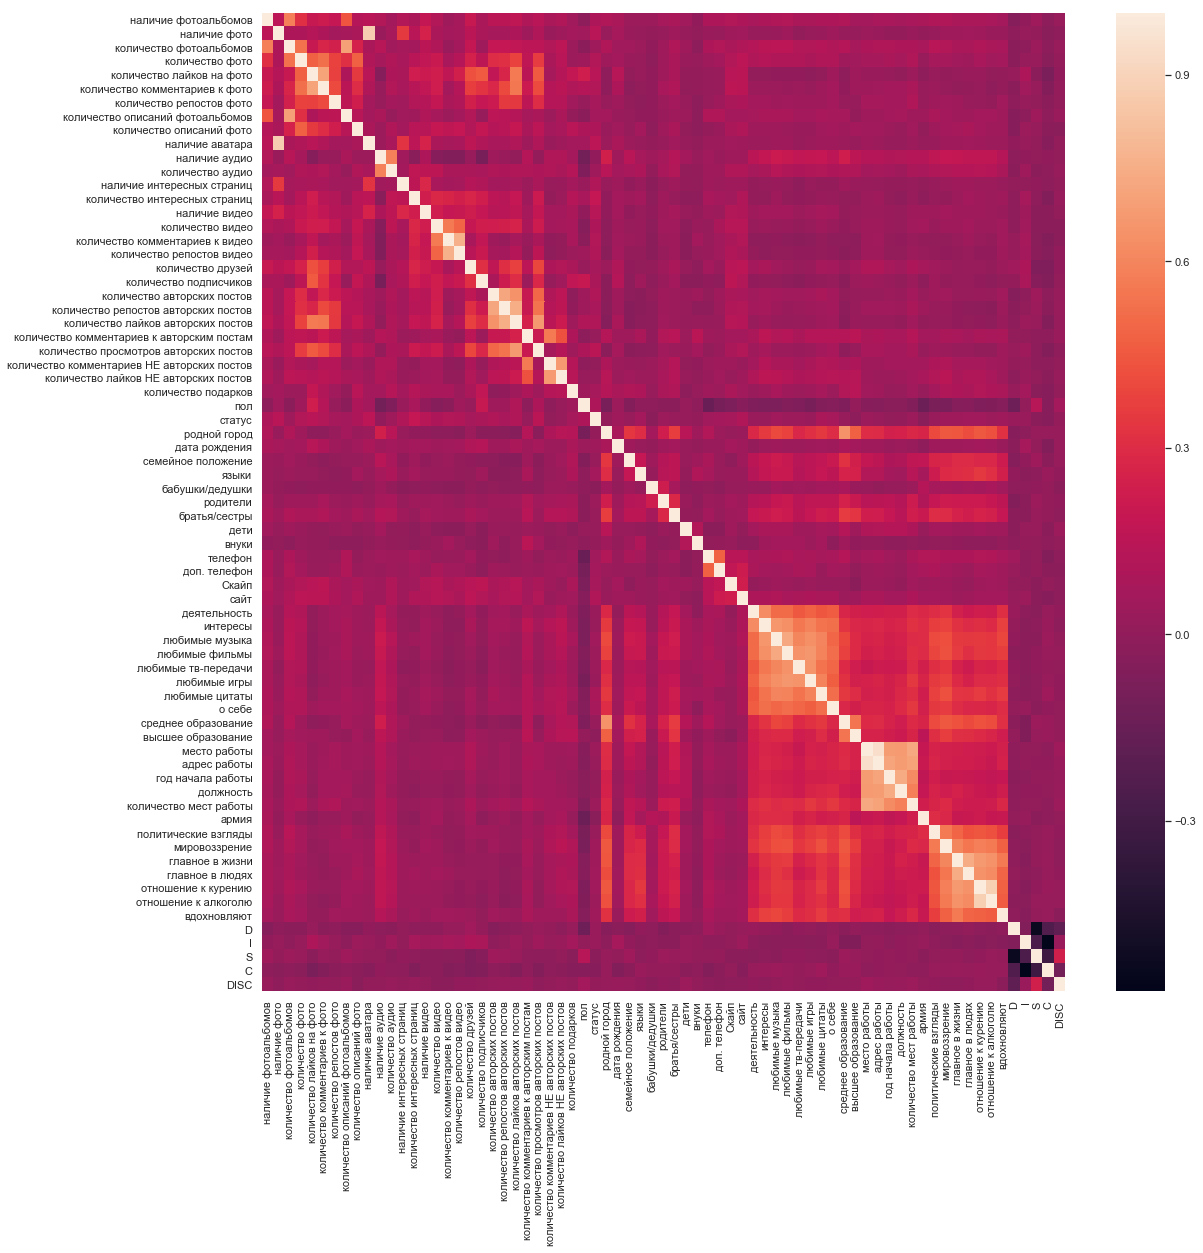

In [15]:
corr_matrix = data_filtered.corr()
sns.set(rc={'figure.figsize':(18,18)})
sns_plot=sns.heatmap(corr_matrix)

In [16]:
sns_plot.get_figure().savefig('corr_filtered.png')

In [17]:
corr_matrix.to_excel('corr_filtered_matrix.xls')

Столбцы D и S заметно коррелируют с полом. Пропустил на прошлом шаге

Попробуем уменшить размерность и сделать кластеризацию. Сначала TSNE

In [18]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [19]:
# Отмасштабируем
X_f = data_filtered[x_counters_columns]
scaler = StandardScaler()
X__f_scaled = scaler.fit_transform(X_f)

In [20]:
%%time
tsne_all = TSNE(random_state=127)
tsne_all_representation = tsne_all.fit_transform(X__f_scaled)

Wall time: 1min 23s


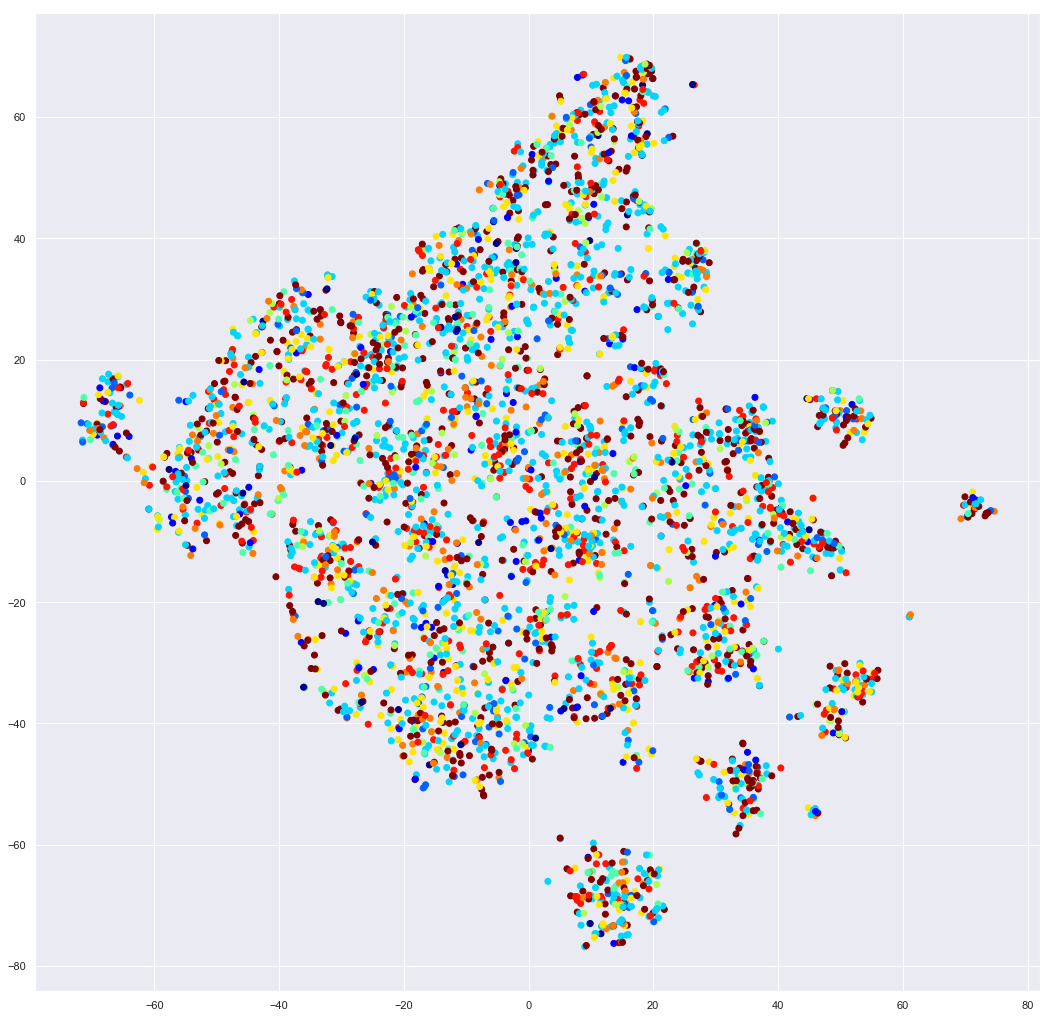

In [21]:
fig_tsne_all= plt.scatter(tsne_all_representation[:, 0], tsne_all_representation[:, 1], 
            c=data_filtered['DISC'], cmap='jet');

Получилось не очень.

Снова деревья. 
DecisionTree, потом лес, потом деревья с градиентным бустом. 
Сначала на отфильтрованых счётчиках, потом с добавлением бинарных и категориальных признаков

In [22]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X__f_scaled, data_filtered[y_columns[-1]].values, test_size=0.3,
                                                          random_state=17)

In [24]:
tree = DecisionTreeClassifier(max_depth=15, random_state=17)

In [25]:
tree_params = {'max_depth': range(1,11),
               'max_features': range(2,29)}

In [26]:
X_train.shape

(2709, 29)

In [27]:
%%time
tree_grid = GridSearchCV(tree, tree_params,
                         cv=5, n_jobs=-1,
                        verbose=True)
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.9s


Wall time: 14.8 s


[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   14.5s finished


In [28]:
tree_grid.best_params_

{'max_depth': 1, 'max_features': 2}

In [29]:
tree_grid.best_score_

0.2768549280177187

In [30]:
accuracy_score(y_test, tree_grid.predict(X_test))

0.29259896729776247

Отвратительно. 

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

forest_params = {'max_depth': range(1,3),
               'max_features': range(1,29)}

forest_grid = GridSearchCV(forest, forest_params,
                         cv=5, n_jobs=-1,
                         verbose=True)

forest_grid.fit(X_train, y_train)

accuracy_score(y_test, forest_grid.predict(X_test))

0.2532342861168817
Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   24.1s finished


0.2917383820998279

In [32]:
forest_grid.best_params_, forest_grid.best_score_

({'max_depth': 2, 'max_features': 12}, 0.2779623477297896)

Тот же результат. Теперь с бустом

In [33]:
import xgboost as xgb

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X__f_scaled, data_filtered[y_columns[-1]].values, test_size=0.3,
                                                          random_state=17)

In [35]:
xg_class = xgb.XGBClassifier(max_depth=5, learning_rate=0.05, n_estimators=200,
                        objective='multi:softprob', gamma=0., 
                        max_delta_step=0., subsample=0.9, colsample_bytree=0.9,
                        seed=0, num_class=10) 
xg_class.fit(X_train, y_train)
y_pred = xg_class.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 26.76%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Добавим к отмасштабированным данным бинарные и попробуем ещё раз

In [37]:
x_bins_and_cats = data_filtered[list(set(x_columns.values) - set(x_counters_columns))]

family_bins = pd.get_dummies(x_bins_and_cats['семейное положение'],prefix='family_')
x_bins_and_cats = x_bins_and_cats.drop('семейное положение',axis=1)
x_bins_and_cats= x_bins_and_cats.join(family_bins)

politic_bins = pd.get_dummies(x_bins_and_cats['политические взгляды'],prefix='politics_')
x_bins_and_cats = x_bins_and_cats.drop('политические взгляды',axis=1)
x_bins_and_cats= x_bins_and_cats.join(politic_bins)

sex_bins = pd.get_dummies(x_bins_and_cats['пол'],prefix='sex_')
x_bins_and_cats = x_bins_and_cats.drop('пол',axis=1)
x_bins_and_cats= x_bins_and_cats.join(sex_bins)

main_life_bins = pd.get_dummies(x_bins_and_cats['главное в жизни'],prefix='life_')
x_bins_and_cats = x_bins_and_cats.drop('главное в жизни',axis=1)
x_bins_and_cats= x_bins_and_cats.join(main_life_bins)

main_person_bins = pd.get_dummies(x_bins_and_cats['главное в людях'],prefix='person_')
x_bins_and_cats = x_bins_and_cats.drop('главное в людях',axis=1)
x_bins_and_cats= x_bins_and_cats.join(main_person_bins)

smoke_bins = pd.get_dummies(x_bins_and_cats['отношение к курению'],prefix='smoke_')
x_bins_and_cats = x_bins_and_cats.drop('отношение к курению',axis=1)
x_bins_and_cats= x_bins_and_cats.join(smoke_bins)

drink_bins = pd.get_dummies(x_bins_and_cats['отношение к алкоголю'],prefix='drink_')
x_bins_and_cats = x_bins_and_cats.drop('отношение к алкоголю',axis=1)
x_bins_and_cats= x_bins_and_cats.join(drink_bins)

In [38]:
scaled_df = pd.DataFrame(X__f_scaled, columns=x_counters_columns)

In [39]:
scaled_df

,количество фотоальбомов,количество фото,количество лайков на фото,количество комментариев к фото,количество репостов фото,количество описаний фотоальбомов,количество описаний фото,количество аудио,количество интересных страниц,количество видео,...,количество комментариев НЕ авторских постов,количество лайков НЕ авторских постов,количество подарков,языки,бабушки/дедушки,родители,братья/сестры,дети,внуки,количество мест работы
0,-0.557696,-0.403187,0.219522,-0.022807,-0.345685,-0.419805,-0.075320,-0.478171,-0.773790,-0.474534,...,-0.174973,-0.224074,0.005239,-0.24627,-0.054028,-0.17616,1.841233,-0.089210,-0.027849,-0.208507
1,-0.163243,0.852228,2.123805,1.574158,-0.345685,-0.419805,0.169682,-0.478171,-0.363206,1.667277,...,-0.174973,-0.224074,-0.435674,-0.24627,-0.054028,-0.17616,-0.300096,-0.089210,-0.027849,-0.208507
2,1.020115,2.996895,-0.008156,1.476565,-0.345685,1.286300,1.782301,2.700225,-0.496646,0.440917,...,-0.174973,0.190945,0.210999,-0.24627,-0.054028,-0.17616,-0.300096,-0.089210,-0.027849,-0.208507
3,-0.163243,-0.339254,-0.367962,0.092529,-0.345685,0.433248,-0.316664,-0.170210,-0.773790,-0.444307,...,-0.174973,-0.224074,-0.435674,-0.24627,-0.054028,-0.17616,-0.300096,-0.089210,-0.027849,-0.208507
4,0.231210,0.358199,-0.197017,-0.324456,1.607339,-0.419805,0.122144,-0.478171,-0.496646,2.897954,...,-0.174973,-0.224074,-0.435674,-0.24627,-0.054028,-0.17616,-0.300096,-0.089210,-0.027849,-0.208507
5,-0.557696,-0.501993,-0.474710,-0.519640,-0.345685,-0.419805,-0.419053,-0.347433,-0.660879,-0.206808,...,-0.174973,-0.224074,-0.435674,-0.24627,-0.054028,-0.17616,-0.300096,-0.089210,-0.027849,-0.208507
6,3.386832,0.869664,0.176972,3.685700,-0.345685,1.286300,0.443937,-0.289327,-0.270825,-0.509080,...,-0.174973,-0.224074,-0.435674,-0.24627,-0.054028,-0.17616,-0.300096,-0.089210,-0.027849,-0.208507
7,0.231210,4.165128,1.107092,1.192661,4.862379,0.433248,2.517305,-0.478171,-0.938023,-0.522034,...,-0.174973,-0.224074,-0.435674,-0.24627,-0.054028,-0.17616,-0.300096,-0.089210,-0.027849,-0.208507
8,2.597926,2.450557,-0.173130,-0.164759,-0.020181,5.551563,1.431255,-0.478171,-0.845642,-0.340671,...,-0.174973,-0.224074,-0.435674,-0.24627,-0.054028,-0.17616,-0.300096,-0.089210,-0.027849,-0.208507
9,-0.163243,-0.513617,-0.654612,-0.510768,-0.345685,0.433248,-0.426366,0.550304,-0.383735,-0.340671,...,-0.174973,-0.224074,-0.024155,-0.24627,-0.054028,-0.17616,-0.300096,-0.089210,-0.027849,-0.208507


In [40]:
X_f_scaled_cats = x_bins_and_cats.reset_index(drop=True).join(scaled_df)

In [41]:
X_f_scaled_cats

,доп. телефон,наличие аватара,интересы,высшее образование,армия,статус,телефон,любимые игры,мировоззрение,наличие видео,...,количество комментариев НЕ авторских постов,количество лайков НЕ авторских постов,количество подарков,языки,бабушки/дедушки,родители,братья/сестры,дети,внуки,количество мест работы
0,0,1,0,1,0,1,0,0,1,1,...,-0.174973,-0.224074,0.005239,-0.24627,-0.054028,-0.17616,1.841233,-0.089210,-0.027849,-0.208507
1,0,1,0,0,0,1,0,0,0,1,...,-0.174973,-0.224074,-0.435674,-0.24627,-0.054028,-0.17616,-0.300096,-0.089210,-0.027849,-0.208507
2,0,1,0,0,0,1,0,0,0,1,...,-0.174973,0.190945,0.210999,-0.24627,-0.054028,-0.17616,-0.300096,-0.089210,-0.027849,-0.208507
3,0,1,0,0,0,1,0,0,0,1,...,-0.174973,-0.224074,-0.435674,-0.24627,-0.054028,-0.17616,-0.300096,-0.089210,-0.027849,-0.208507
4,0,1,0,0,0,1,0,0,0,1,...,-0.174973,-0.224074,-0.435674,-0.24627,-0.054028,-0.17616,-0.300096,-0.089210,-0.027849,-0.208507
5,0,1,0,0,0,0,0,0,0,1,...,-0.174973,-0.224074,-0.435674,-0.24627,-0.054028,-0.17616,-0.300096,-0.089210,-0.027849,-0.208507
6,0,1,0,0,0,0,0,0,0,1,...,-0.174973,-0.224074,-0.435674,-0.24627,-0.054028,-0.17616,-0.300096,-0.089210,-0.027849,-0.208507
7,0,1,0,0,0,0,0,0,0,1,...,-0.174973,-0.224074,-0.435674,-0.24627,-0.054028,-0.17616,-0.300096,-0.089210,-0.027849,-0.208507
8,0,1,0,0,0,0,0,0,0,1,...,-0.174973,-0.224074,-0.435674,-0.24627,-0.054028,-0.17616,-0.300096,-0.089210,-0.027849,-0.208507
9,0,1,1,1,0,0,0,1,1,1,...,-0.174973,-0.224074,-0.024155,-0.24627,-0.054028,-0.17616,-0.300096,-0.089210,-0.027849,-0.208507


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_f_scaled_cats.values, data_filtered[y_columns[-1]].values, test_size=0.3,
                                                          random_state=17)

DecisionTree

In [43]:
%%time
tree = DecisionTreeClassifier(max_depth=15, random_state=17)
tree_params = {'max_depth': range(1,11),
               'max_features': range(2,29)}
tree_grid = GridSearchCV(tree, tree_params,
                         cv=5, n_jobs=-1,
                        verbose=True)
tree_grid.fit(X_train, y_train)
print(tree_grid.best_params_)
print(tree_grid.best_score_)
accuracy = accuracy_score(y_test, tree_grid.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 903 tasks      | elapsed:   14.3s


{'max_depth': 1, 'max_features': 2}
0.2812846068660022
Accuracy: 29.86%
Wall time: 15.3 s


[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   15.1s finished


In [44]:
tree_grid.best_estimator_.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [45]:
X_f_scaled_cats.columns[76:78]

Index(['drink__3', 'drink__4'], dtype='object')

Ансамбль

In [46]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

forest_params = {'max_depth': range(1,3),
               'max_features': range(1,29)}

forest_grid = GridSearchCV(forest, forest_params,
                         cv=5, n_jobs=-1,
                         verbose=True)

forest_grid.fit(X_train, y_train)

accuracy_score(y_test, forest_grid.predict(X_test))

0.2594662390584613
Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   22.7s finished


0.2917383820998279

In [47]:
np.argmax(forest_grid.best_estimator_.feature_importances_)

81

In [48]:
forest_grid.best_estimator_.feature_importances_[81]

0.12720589411523078

In [51]:
X_f_scaled_cats.columns[81]

'количество лайков на фото'

XGBoost 

In [50]:
xg_class = xgb.XGBClassifier(max_depth=15, learning_rate=0.1, n_estimators=100,
                        objective='multi:softprob', gamma=0., 
                        max_delta_step=0., subsample=0.9, colsample_bytree=0.8,
                        seed=0, num_class=10) 
xg_class.fit(X_train, y_train)
y_pred = xg_class.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 25.13%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Попробуем сгенерить новые фичи

In [118]:
data_filtered_counters = data_filtered[x_big_counters_columns]
x_big_counters_columns

['количество фотоальбомов',
 'количество фото',
 'количество лайков на фото',
 'количество комментариев к фото',
 'количество репостов фото',
 'количество описаний фотоальбомов',
 'количество описаний фото',
 'количество аудио',
 'количество интересных страниц',
 'количество видео',
 'количество комментариев к видео',
 'количество репостов видео',
 'количество друзей',
 'количество подписчиков',
 'количество авторских постов',
 'количество репостов авторских постов',
 'количество лайков авторских постов',
 'количество комментариев к авторским постам',
 'количество просмотров авторских постов',
 'количество комментариев НЕ авторских постов',
 'количество лайков НЕ авторских постов',
 'количество подарков']

In [119]:
f_albums2photo = data_filtered_counters['количество фотоальбомов'] + data_filtered_counters['количество фотоальбомов'].mean()/    (data_filtered_counters['количество фото']+data_filtered_counters['количество фото'].mean())

In [120]:
f_albums2photo.describe()

count    3871.000000
mean        1.424874
std         2.533371
min         0.000988
25%         0.014086
50%         0.015820
75%         2.004455
max        18.004989
dtype: float64

In [121]:
data_filtered_counters_gen = data_filtered_counters.join(f_albums2photo.to_frame(name = 'f_albums2photo'))

In [122]:
data_filtered_counters_gen.describe()

,количество фотоальбомов,количество фото,количество лайков на фото,количество комментариев к фото,количество репостов фото,количество описаний фотоальбомов,количество описаний фото,количество аудио,количество интересных страниц,количество видео,...,количество подписчиков,количество авторских постов,количество репостов авторских постов,количество лайков авторских постов,количество комментариев к авторским постам,количество просмотров авторских постов,количество комментариев НЕ авторских постов,количество лайков НЕ авторских постов,количество подарков,f_albums2photo
count,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,...,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000
mean,1.413847,89.370189,876.926376,58.570654,1.061999,0.492121,117.597520,164.585895,99.384397,123.892534,...,136.849135,269.929992,20.771635,593.100232,10.144924,4880.433480,2.712736,5.939034,14.821751,1.424874
std,2.535486,172.076927,1339.784638,112.728391,3.072556,1.172412,273.503415,344.243191,97.434913,231.609638,...,173.597089,673.649452,54.629738,1193.467762,44.642565,8820.011878,15.505776,26.508268,34.024702,2.533371
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000988
25%,0.000000,6.000000,70.000000,1.000000,0.000000,0.000000,2.000000,0.000000,30.000000,3.500000,...,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014086
50%,0.000000,25.000000,357.000000,12.000000,0.000000,0.000000,26.000000,0.000000,71.000000,32.000000,...,85.000000,19.000000,1.000000,91.000000,0.000000,1301.000000,0.000000,0.000000,0.000000,0.015820
75%,2.000000,92.000000,1066.000000,59.500000,1.000000,0.000000,116.000000,146.000000,134.000000,132.000000,...,180.000000,192.000000,14.000000,587.000000,0.000000,5753.000000,0.000000,0.000000,11.000000,2.004455
max,18.000000,2109.000000,9357.000000,891.000000,40.000000,8.000000,2797.000000,2127.000000,620.000000,1800.000000,...,1586.000000,7004.000000,597.000000,9691.000000,654.000000,73592.000000,229.000000,286.000000,227.000000,18.004989


In [123]:
f_photo2likes = data_filtered_counters['количество фото'] + data_filtered_counters['количество фото'].mean() \
    /(data_filtered_counters['количество лайков на фото']+data_filtered_counters['количество лайков на фото'].mean())
f_photo2repost = data_filtered_counters['количество фото'] + data_filtered_counters['количество фото'].mean() \
    /(data_filtered_counters['количество репостов фото']+data_filtered_counters['количество репостов фото'].mean())
f_friends2likes = data_filtered_counters['количество лайков на фото'] \
    + data_filtered_counters['количество лайков на фото'].mean() \
    /(data_filtered_counters['количество друзей']+data_filtered_counters['количество друзей'].mean())
f_repost_photo2friends = (data_filtered_counters['количество репостов фото'] \
    + data_filtered_counters['количество репостов фото'].mean() \
    /(data_filtered_counters['количество друзей']+data_filtered_counters['количество друзей'].mean()))
f_repost_photo2subscribers = data_filtered_counters['количество репостов фото'] \
    + data_filtered_counters['количество репостов фото'].mean() \
    /(data_filtered_counters['количество подписчиков']+data_filtered_counters['количество подписчиков'].mean())
f_post2repost = data_filtered_counters['количество авторских постов'] \
    + data_filtered_counters['количество авторских постов'].mean() \
    /(data_filtered_counters['количество репостов авторских постов']+data_filtered_counters['количество репостов авторских постов'].mean())
f_post2subscribers = data_filtered_counters['количество авторских постов'] \
    + data_filtered_counters['количество авторских постов'].mean() \
    /(data_filtered_counters['количество подписчиков']+data_filtered_counters['количество подписчиков'].mean())
f_friends2subscribers = data_filtered_counters['количество друзей'] \
    + data_filtered_counters['количество друзей'].mean() \
    /(data_filtered_counters['количество подписчиков']+data_filtered_counters['количество подписчиков'].mean())
f_post_likes2other_post_likes = data_filtered_counters['количество лайков авторских постов'] \
    + data_filtered_counters['количество лайков авторских постов'].mean() \
    /(data_filtered_counters['количество лайков НЕ авторских постов']+data_filtered_counters['количество лайков НЕ авторских постов'].mean())
f_repost2subscribers = data_filtered_counters['количество репостов авторских постов'] \
    + data_filtered_counters['количество репостов авторских постов'].mean() \
    /(data_filtered_counters['количество подписчиков'] + data_filtered_counters['количество подписчиков'].mean())

In [124]:
data_filtered_counters_gen = (data_filtered_counters.join(f_photo2likes.to_frame(name = 'f_photo2likes')).
                              join(f_photo2repost.to_frame(name = 'f_photo2repost')).
                              join(f_friends2likes.to_frame(name = 'f_friends2likes')).
                              join(f_repost_photo2friends.to_frame(name = 'f_repost_photo2friends')).
                              join(f_repost_photo2subscribers.to_frame(name = 'f_repost_photo2subscribers')).
                              join(f_post2repost.to_frame(name = 'f_post2repost')).
                              join(f_post2subscribers.to_frame(name = 'f_post2subscribers')).
                              join(f_friends2subscribers.to_frame(name = 'f_friends2subscribers')).
                              join(f_post_likes2other_post_likes.to_frame(name = 'f_post_likes2other_post_likes')).
                              join(f_repost2subscribers.to_frame(name = 'f_repost2subscribers')))


In [125]:
data_filtered_counters_gen.describe()

,количество фотоальбомов,количество фото,количество лайков на фото,количество комментариев к фото,количество репостов фото,количество описаний фотоальбомов,количество описаний фото,количество аудио,количество интересных страниц,количество видео,...,f_photo2likes,f_photo2repost,f_friends2likes,f_repost_photo2friends,f_repost_photo2subscribers,f_post2repost,f_post2subscribers,f_friends2subscribers,f_post_likes2other_post_likes,f_repost2subscribers
count,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,...,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000
mean,1.413847,89.370189,876.926376,58.570654,1.061999,0.492121,117.597520,164.585895,99.384397,123.892534,...,89.438470,157.593040,880.892790,1.066803,1.066854,280.076749,271.163851,131.585051,683.764599,20.866583
std,2.535486,172.076927,1339.784638,112.728391,3.072556,1.172412,273.503415,344.243191,97.434913,231.609638,...,172.064038,162.241197,1339.134239,3.072161,3.072196,671.163088,673.585098,138.381231,1189.705731,54.620551
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.101913,20.085363,2.208959,0.000800,0.000660,9.772039,0.163807,0.187164,20.494818,0.012605
25%,0.000000,6.000000,70.000000,1.000000,0.000000,0.000000,2.000000,0.000000,30.000000,3.500000,...,6.085980,87.152761,75.095405,0.004425,0.004355,12.995125,1.930151,46.682775,99.864767,0.116794
50%,0.000000,25.000000,357.000000,12.000000,0.000000,0.000000,26.000000,0.000000,71.000000,32.000000,...,25.093785,101.152761,361.341514,0.006104,0.006644,30.896737,20.205857,96.399532,184.864767,1.132431
75%,2.000000,92.000000,1066.000000,59.500000,1.000000,0.000000,116.000000,146.000000,134.000000,132.000000,...,92.065684,155.341518,1070.532603,1.003443,1.003310,199.463866,193.124332,168.756383,661.597127,14.049404
max,18.000000,2109.000000,9357.000000,891.000000,40.000000,8.000000,2797.000000,2127.000000,620.000000,1800.000000,...,2109.066008,2152.341518,9357.922123,40.002523,40.001644,7010.962048,7005.371253,1318.203443,9790.864767,597.027301


In [126]:
from sklearn.preprocessing import QuantileTransformer

In [127]:
scaler = QuantileTransformer()

In [128]:
data_filtered_counters_gen[data_filtered_counters_gen.columns] = scaler.fit_transform(
    data_filtered_counters_gen[data_filtered_counters_gen.columns]) 

Попробуем на сгенерированных фичах и счётчиках

In [131]:
X_train, X_test, y_train, y_test = train_test_split(data_filtered_counters_gen.values, data_filtered[y_columns[-1]].values, test_size=0.3,
                                                          random_state=17)

In [134]:
xg_class = xgb.XGBClassifier(max_depth=15, learning_rate=0.01, n_estimators=100,
                        objective='multi:softprob',seed=0, num_class=10) 
xg_class.fit(X_train, y_train)
y_pred = xg_class.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 24.70%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [135]:
%%time
tree = DecisionTreeClassifier(max_depth=15, random_state=17)
tree_params = {'max_depth': range(1,11),
               'max_features': range(2,29)}
tree_grid = GridSearchCV(tree, tree_params,
                         cv=5, n_jobs=-1,
                        verbose=True)
tree_grid.fit(X_train, y_train)
print(tree_grid.best_params_)
print(tree_grid.best_score_)
accuracy = accuracy_score(y_test, tree_grid.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.9s


{'max_depth': 1, 'max_features': 5}
0.27759320782576596
Accuracy: 28.40%
Wall time: 15.6 s


[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   15.3s finished


In [136]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

forest_params = {'max_depth': range(1,3),
               'max_features': range(1,29)}

forest_grid = GridSearchCV(forest, forest_params,
                         cv=5, n_jobs=-1,
                         verbose=True)

forest_grid.fit(X_train, y_train)

accuracy_score(y_test, forest_grid.predict(X_test))

0.2638740909489875
Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   25.5s finished


0.2882960413080895

In [137]:
X_f_scaled_cats_and_features = x_bins_and_cats.reset_index(drop=True).join(data_filtered_counters_gen)

In [140]:
X_f_scaled_cats_and_features.describe()

,доп. телефон,наличие аватара,интересы,высшее образование,армия,статус,телефон,любимые игры,мировоззрение,наличие видео,...,f_photo2likes,f_photo2repost,f_friends2likes,f_repost_photo2friends,f_repost_photo2subscribers,f_post2repost,f_post2subscribers,f_friends2subscribers,f_post_likes2other_post_likes,f_repost2subscribers
count,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,...,3.181000e+03,3181.000000,3.181000e+03,3.181000e+03,3.181000e+03,3.181000e+03,3.181000e+03,3181.000000,3181.000000,3.181000e+03
mean,0.053475,0.955567,0.057866,0.161715,0.026091,0.423405,0.102557,0.048308,0.111341,0.844226,...,5.398220e-01,0.529908,5.477675e-01,4.951455e-01,4.891036e-01,5.089984e-01,5.053561e-01,0.546887,0.516270,5.058276e-01
std,0.225007,0.206082,0.233520,0.368237,0.159428,0.494162,0.303419,0.214444,0.314594,0.362688,...,2.798009e-01,0.289639,2.747121e-01,3.026079e-01,3.058827e-01,2.967697e-01,3.036596e-01,0.272787,0.295305,3.058289e-01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000e-07,0.000220,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,0.000021,0.000170,1.000000e-07
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,3.110770e-01,0.281782,3.254377e-01,2.247247e-01,2.162162e-01,1.391391e-01,2.132132e-01,0.318640,0.155155,2.177177e-01
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,5.499859e-01,0.549550,5.607552e-01,4.734735e-01,4.594595e-01,5.240240e-01,5.242849e-01,0.560528,0.537375,5.283755e-01
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,7.821245e-01,0.780781,7.845381e-01,7.807808e-01,7.800671e-01,7.731742e-01,7.730845e-01,0.781701,0.780572,7.823359e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.999999e-01,1.000000,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,1.000000,1.000000,9.999999e-01


In [141]:
X_train, X_test, y_train, y_test = train_test_split(data_filtered_counters_gen.values, data_filtered[y_columns[-1]].values, test_size=0.3,
                                                          random_state=17)

In [142]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

forest_params = {'max_depth': range(1,3),
               'max_features': range(1,29)}

forest_grid = GridSearchCV(forest, forest_params,
                         cv=5, n_jobs=-1,
                         verbose=True)

forest_grid.fit(X_train, y_train)

accuracy_score(y_test, forest_grid.predict(X_test))

0.2638740909489875
Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   25.6s finished


0.2882960413080895

In [143]:
%%time
tree = DecisionTreeClassifier(max_depth=15, random_state=17)
tree_params = {'max_depth': range(1,11),
               'max_features': range(2,29)}
tree_grid = GridSearchCV(tree, tree_params,
                         cv=5, n_jobs=-1,
                        verbose=True)
tree_grid.fit(X_train, y_train)
print(tree_grid.best_params_)
print(tree_grid.best_score_)
accuracy = accuracy_score(y_test, tree_grid.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.5s


{'max_depth': 1, 'max_features': 5}
0.27759320782576596
Accuracy: 28.40%
Wall time: 15.2 s


[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   15.0s finished


In [144]:
xg_class = xgb.XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=100,
                        objective='multi:softmax',seed=0, num_class=10) 
xg_class.fit(X_train, y_train)
y_pred = xg_class.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 25.30%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [145]:
y_test

array([4, 9, 3, ..., 4, 4, 4], dtype=int64)

In [146]:
y_pred

array([ 4, 10,  4, ..., 10,  4,  4], dtype=int64)

In [156]:
y_to_simplify = data_filtered[y_columns[-5:-1]]

Упростим до 4 классов

In [150]:
y_to_simplify.describe()

,D,I,S,C
count,3871.000000,3871.000000,3871.000000,3871.000000
mean,3.091708,3.658745,4.140532,6.109016
std,1.657685,1.775239,1.980366,2.044214
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,3.000000,5.000000
50%,3.000000,4.000000,4.000000,6.000000
75%,4.000000,5.000000,5.000000,7.000000
max,9.000000,11.000000,11.000000,13.000000


In [158]:
y_to_simplify.idxmax(axis=1).values

array(['D', 'C', 'I', ..., 'D', 'C', 'D'], dtype=object)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(data_filtered_counters_gen.values, y_to_simplify.idxmax(axis=1).values, test_size=0.3,
                                                          random_state=17)

In [155]:
%%time
tree = DecisionTreeClassifier(max_depth=15, random_state=17)
tree_params = {'max_depth': range(1,11),
               'max_features': range(2,29)}
tree_grid = GridSearchCV(tree, tree_params,
                         cv=5, n_jobs=-1,
                        verbose=True)
tree_grid.fit(X_train, y_train)
print(tree_grid.best_params_)
print(tree_grid.best_score_)
accuracy = accuracy_score(y_test, tree_grid.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.7s


{'max_depth': 2, 'max_features': 6}
0.5108896271686969
Accuracy: 52.84%
Wall time: 15.6 s


[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   15.3s finished


In [161]:
xg_class = xgb.XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=300,
                        objective='multi:softprob',seed=0, num_class=10) 
xg_class.fit(X_train, y_train)
y_pred = xg_class.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 47.50%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [159]:
# zero rule algorithm for classification
def zero_rule_algorithm_classification(train, test):
    output_values = [row[-1] for row in train]
    prediction = max(set(output_values), key=output_values.count)
    predicted = [prediction for i in range(len(test))]
    return predicted

y_base = zero_rule_algorithm_classification(y_train[:,None], y_test[:,None])

accuracy = accuracy_score(y_test, y_base)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 52.84%


Вывод: простое указание наиболее вероятного класса даёт точно такую же точность как и классификаторы 

In [163]:
%%time
xg_class = xgb.XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=300,
                        objective='multi:softprob',seed=0, num_class=10, early_stopping_rounds=50) 
tree_params = {'max_depth': range(1,11),
               'learning_rate': [0.01, 0.03,0.07,0.1],
              'n_estimators': [20,50,100,200]}
xgb_grid = GridSearchCV(xg_class, tree_params,
                         cv=5, n_jobs=-1,
                        verbose=True)
xgb_grid.fit(X_train, y_train)
print(xgb_grid.best_params_)
print(xgb_grid.best_score_)
accuracy = accuracy_score(y_test, xgb_grid.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  3.2min finished


{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100}
0.5105204872646734
Accuracy: 52.84%
Wall time: 3min 10s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


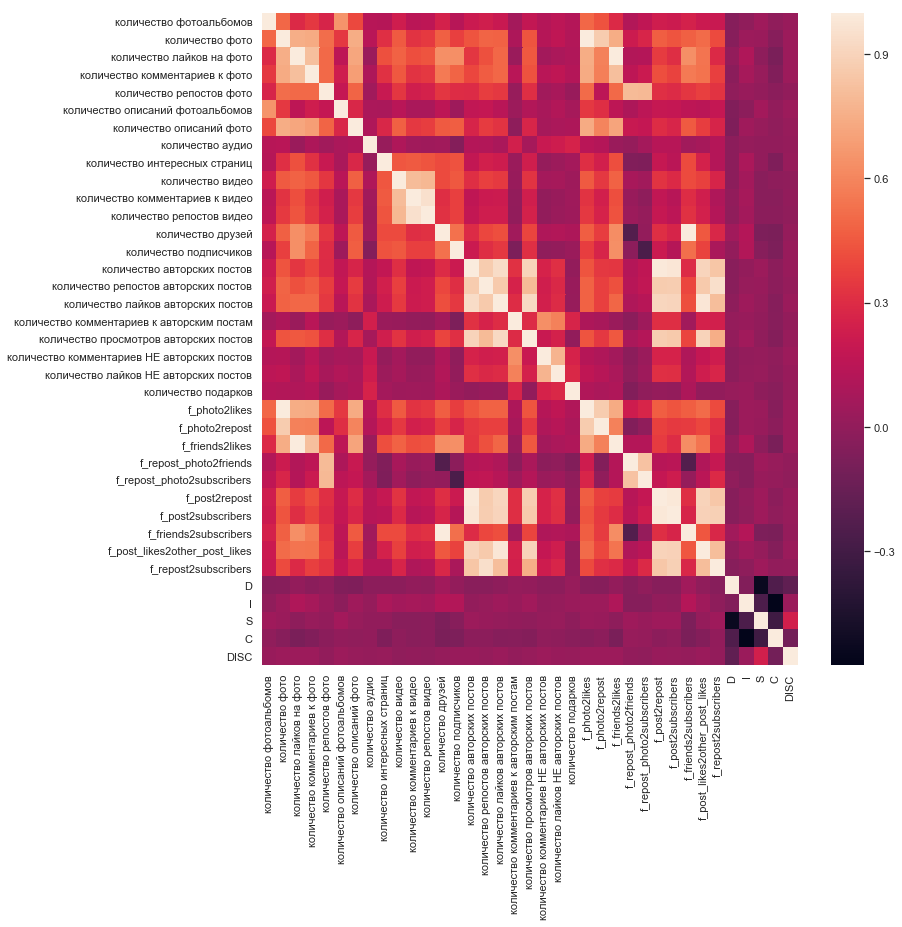

In [177]:
z = data_filtered[y_columns]
correlation = data_filtered_counters_gen.join(z, lsuffix='z_')
corr_matrix = correlation.corr()
sns_plot=sns.heatmap(corr_matrix)

In [178]:
corr_matrix.to_excel('generated_corr.xls')

In [179]:
correlation = data_filtered_counters_gen.join(y_s, lsuffix='z_')
corr_matrix = correlation.corr()
sns_plot=sns.heatmap(corr_matrix)

'DISC'